# **Imports**

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# from tensorflow.keras.utils import to_categorical
import os
import random
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout, concatenate
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import f1_score
from tensorflow.keras import backend as K

## **Check** **GPU**

In [ ]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# **Read The Data and Labels**

In [ ]:
#addresses
train_path="F:\\_lectures\\Semester5\\Deep Learning\\Assignment\\Data\\train"
test_path="F:\\_lectures\\Semester5\\Deep Learning\\Assignment\\Data\\test"

In [ ]:
#copy from the training labels
train_labels = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
                'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
                'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
                'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
                'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
                'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
                'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
                'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
                'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
                'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
                'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']

In [ ]:
#count how many pictures in each class
dic={}
for folder in os.listdir(train_path): #open train_path and read each folder name [0,1,2,...,103]
    path=train_path+"/"+folder # add the folder name to train_path 
    counter=0 #will act as a label for the images
    for img in os.listdir(path):# open the each folder in the training path and read the image's address
        counter+=1
    dic[train_labels[int(folder)]]=counter

In [ ]:
dic

{'pink primrose': 272,
 'hard-leaved pocket orchid': 26,
 'snapdragon': 136,
 'trumpet creeper': 31,
 'blackberry lily': 25,
 'common tulip': 390,
 'wild rose': 743,
 "colt's foot": 43,
 'king protea': 92,
 'spear thistle': 263,
 'yellow iris': 227,
 'globe-flower': 21,
 'purple coneflower': 55,
 'peruvian lily': 50,
 'balloon flower': 90,
 'giant white arum lily': 26,
 'canterbury bells': 20,
 'fire lily': 19,
 'pincushion flower': 96,
 'fritillary': 48,
 'red ginger': 19,
 'grape hyacinth': 85,
 'corn poppy': 83,
 'prince of wales feathers': 21,
 'stemless gentian': 34,
 'artichoke': 119,
 'sweet william': 109,
 'sweet pea': 21,
 'carnation': 105,
 'garden phlox': 24,
 'love in the mist': 23,
 'cosmos': 20,
 'alpine sea holly': 18,
 'ruby-lipped cattleya': 36,
 'cape flower': 57,
 'great masterwort': 26,
 'siam tulip': 19,
 'lenten rose': 73,
 'wild geranium': 703,
 'barberton daisy': 64,
 'daffodil': 96,
 'sword lily': 63,
 'poinsettia': 110,
 'bolero deep blue': 18,
 'wallflower': 

In [ ]:
#add data augmentaion to the training data since the data is too small
trainset=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255., #normalize data
     zoom_range=0.2,
     vertical_flip=True,
     brightness_range=(0.2, 0.8),
     validation_split=0.1# validation is 0.1% from the total train folder
)

In [ ]:
#add data augmentaion to the test data since the data is too small
testset=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255. #normalization
)

In [ ]:
#get the data from the training directory and determine the pictures characteristics 
#set the training percentage to be 90% of the data 
train=trainset.flow_from_directory(
    directory=train_path,
    target_size=(192, 192),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset="training",
)

Found 11524 images belonging to 104 classes.


In [ ]:
#get the data from the training directory and determine the pictures characteristics 
#set the validation data percentage to be 10% of the data 
valid=trainset.flow_from_directory(
    directory=train_path,
    target_size=(192, 192),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset="validation"

)

Found 1229 images belonging to 104 classes.


In [ ]:
#get the data from the test directory and determine the pictures characteristics 
test=testset.flow_from_directory(
    directory=test_path,
    target_size=(192, 192),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 3712 images belonging to 104 classes.


In [ ]:
t_img,tclass=next(test) #separate the img from their classes

# **Show Some Random Pictures**

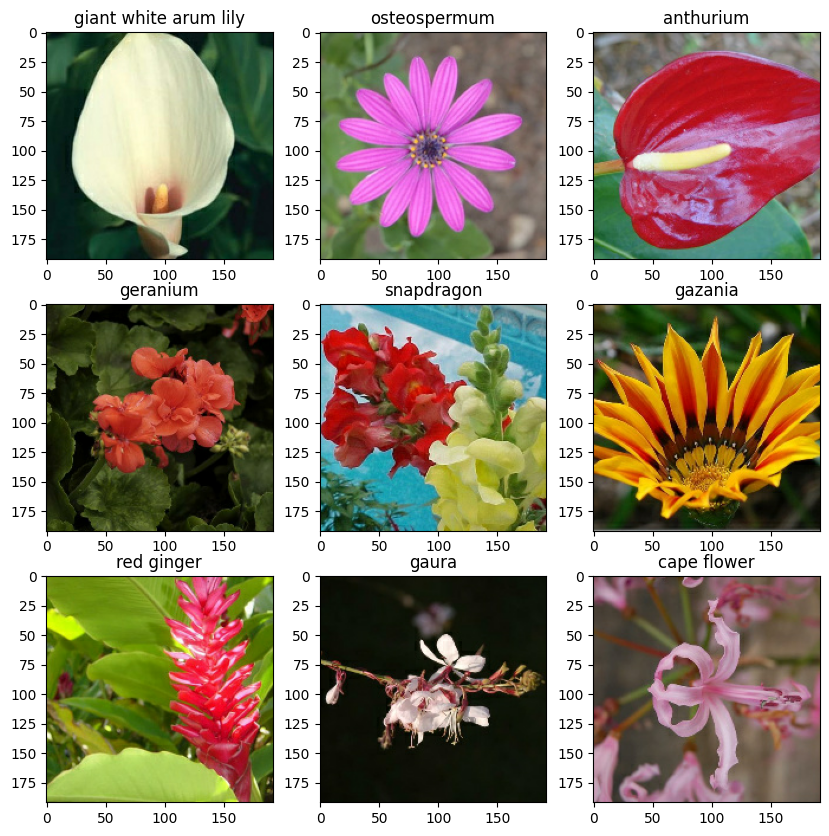

In [ ]:
#pic 9 random flowers and print them
#pic the first picture from a random folder in the training dataset
plt.figure(figsize=(10, 10))
folder=train_path
for i in range(9):
    rd=random.choice(os.listdir(train_path)) # choose a random picture from the training path
    path=folder+"/"+rd
    ax = plt.subplot(3, 3,i + 1)
    for j in os.listdir(path):
        imgg=plt.imread(path+"/"+j)
        plt.imshow(imgg)
        plt.title(train_labels[int(rd)])
        continue

# **Define recall,  precision,  f1-score functions**

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# **1) Simple Model**

In [ ]:
#try new models 
last_model = Sequential()
last_model.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01),input_shape = (192,192,3)))
last_model.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model.add(MaxPooling2D())
last_model.add(layers.BatchNormalization())

last_model.add(Conv2D(32,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model.add(Conv2D(32,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model.add(MaxPooling2D())
last_model.add(layers.BatchNormalization())

last_model.add(Flatten())
last_model.add(Dense(128,activation='relu'))
last_model.add(Dense(128,activation='relu'))
last_model.add(Dropout(0.5))
last_model.add(Dense(104,activation='softmax'))

In [ ]:
last_model.summary()

In [ ]:
#lr = 1e-5
last_model.compile(optimizer=Adam(0.00001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics='accuracy')

In [ ]:
last_model.load_weights('F:\\_lectures\\Semester5\\Z_model_data\\last_model\\')

In [ ]:
last_model_history = last_model.fit(train,batch_size=32,epochs=20,validation_data=valid)

Epoch 1/20
361/361 [==============================] - 125s 347ms/step - loss: 3.3946 - accuracy: 0.3134 - val_loss: 3.5996 - val_accuracy: 0.2848
Epoch 2/20
361/361 [==============================] - 113s 311ms/step - loss: 3.3797 - accuracy: 0.3141 - val_loss: 3.5754 - val_accuracy: 0.2848
Epoch 3/20
361/361 [==============================] - 114s 314ms/step - loss: 3.3936 - accuracy: 0.3076 - val_loss: 3.6066 - val_accuracy: 0.2937
Epoch 4/20
361/361 [==============================] - 114s 314ms/step - loss: 3.3800 - accuracy: 0.3114 - val_loss: 3.6105 - val_accuracy: 0.2864
Epoch 5/20
361/361 [==============================] - 115s 318ms/step - loss: 3.3537 - accuracy: 0.3182 - val_loss: 3.5557 - val_accuracy: 0.2807
Epoch 6/20
361/361 [==============================] - 114s 315ms/step - loss: 3.3577 - accuracy: 0.3176 - val_loss: 3.5765 - val_accuracy: 0.2962
Epoch 7/20
361/361 [==============================] - 115s 318ms/step - loss: 3.3210 - accuracy: 0.3221 - val_loss: 3.5805 -

In [ ]:
last_model.save_weights('F:\\_lectures\\Semester5\\Z_model_data\\last_model\\')

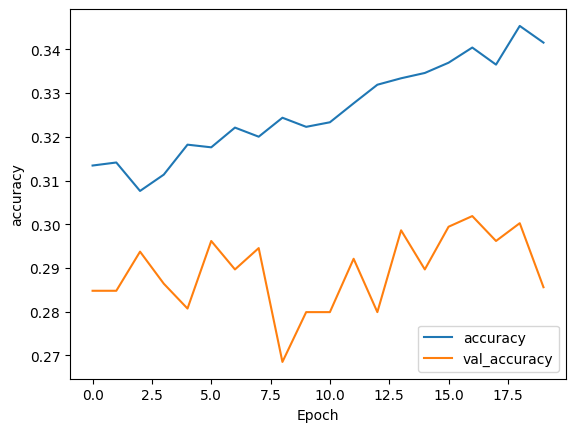

In [ ]:
plt.plot(last_model_history.history['accuracy'], label='accuracy')
plt.plot(last_model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

**Modify1 Add Drop Out Layers + Complixity Reduction**

In [ ]:
last_model1 = Sequential()
last_model1.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01),input_shape = (192,192,3)))
last_model1.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model1.add(MaxPooling2D())
last_model1.add(layers.BatchNormalization())

#decrease fillters from 32 to 16 inorder to reduce the model complexity
last_model1.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model1.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model1.add(MaxPooling2D())
last_model1.add(layers.BatchNormalization())

last_model1.add(Flatten())
last_model1.add(Dense(128,activation='relu'))
#new dropout layer
last_model1.add(Dropout(0.5))
last_model1.add(Dense(128,activation='relu'))
last_model1.add(Dropout(0.5))
last_model1.add(Dense(104,activation='softmax'))

In [ ]:
last_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 192, 192, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 192, 192, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 96, 96, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 16)        2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0

In [ ]:
last_model1.compile(optimizer=Adam(0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics='accuracy')

In [ ]:
last_model1.load_weights('F:\\_lectures\\Semester5\\Z_model_data\\last_model1\\')

In [ ]:
last_model1_history = last_model1.fit(train,batch_size=32,epochs=10,validation_data=valid)

Epoch 1/20
361/361 [==============================] - 127s 352ms/step - loss: 3.8451 - accuracy: 0.1901 - val_loss: 3.6816 - val_accuracy: 0.2319
Epoch 2/20
361/361 [==============================] - 109s 301ms/step - loss: 3.8507 - accuracy: 0.1895 - val_loss: 3.6395 - val_accuracy: 0.2441
Epoch 3/20
361/361 [==============================] - 112s 309ms/step - loss: 3.8436 - accuracy: 0.1869 - val_loss: 3.6659 - val_accuracy: 0.2286
Epoch 4/20
361/361 [==============================] - 109s 301ms/step - loss: 3.8230 - accuracy: 0.1895 - val_loss: 3.6640 - val_accuracy: 0.2360
Epoch 5/20
361/361 [==============================] - 107s 296ms/step - loss: 3.8335 - accuracy: 0.1867 - val_loss: 3.6240 - val_accuracy: 0.2465
Epoch 6/20
361/361 [==============================] - 108s 297ms/step - loss: 3.8302 - accuracy: 0.1929 - val_loss: 3.6403 - val_accuracy: 0.2352
Epoch 7/20
361/361 [==============================] - 113s 313ms/step - loss: 3.8116 - accuracy: 0.1978 - val_loss: 3.6339 -

In [ ]:
last_model1.save_weights('F:\\_lectures\\Semester5\\Z_model_data\\last_model1\\')

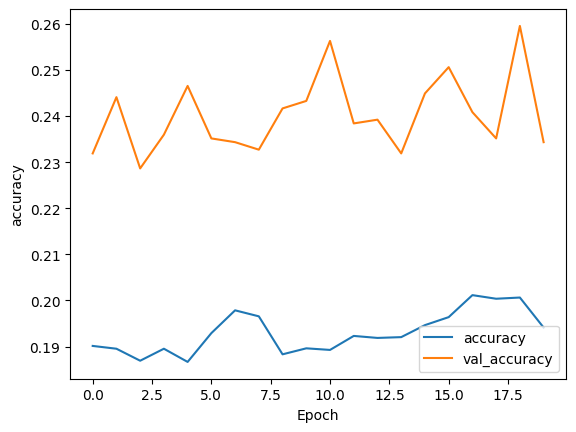

In [ ]:
plt.plot(last_model1_history.history['accuracy'], label='accuracy')
plt.plot(last_model1_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

**Modify2   no extra dropout**

In [ ]:
last_model2 = Sequential()
last_model2.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01),input_shape = (192,192,3)))
last_model2.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model2.add(MaxPooling2D())
last_model2.add(layers.BatchNormalization())

#decrease fillters from 32 to 16 inorder to reduce the model complexity
last_model2.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model2.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model2.add(MaxPooling2D())
last_model2.add(layers.BatchNormalization())

last_model2.add(Flatten())
last_model2.add(Dense(128,activation='relu'))
# no extra dropout
last_model2.add(Dense(128,activation='relu'))
last_model2.add(Dropout(0.5))
last_model2.add(Dense(104,activation='softmax'))

In [ ]:
last_model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 192, 192, 16)      448       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 192, 192, 16)      2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 96, 96, 16)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 96, 96, 16)        64        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 96, 96, 16)        2320      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 48, 48, 16)       

In [ ]:
last_model2.compile(optimizer=Adam(0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics='accuracy')

In [ ]:
last_model2.load_weights('F:\\_lectures\\Semester5\\Z_model_data\\last_model2\\')

In [ ]:
last_model2_history = last_model2.fit(train,batch_size=32,epochs=10,validation_data=valid)

Epoch 1/10
361/361 [==============================] - 137s 376ms/step - loss: 2.6874 - accuracy: 0.3945 - val_loss: 3.1508 - val_accuracy: 0.3100
Epoch 2/10
361/361 [==============================] - 113s 312ms/step - loss: 2.6900 - accuracy: 0.3912 - val_loss: 3.2181 - val_accuracy: 0.2945
Epoch 3/10
361/361 [==============================] - 114s 314ms/step - loss: 2.6695 - accuracy: 0.3953 - val_loss: 3.1673 - val_accuracy: 0.3133
Epoch 4/10
361/361 [==============================] - 115s 317ms/step - loss: 2.6703 - accuracy: 0.3942 - val_loss: 3.1801 - val_accuracy: 0.3198
Epoch 5/10
361/361 [==============================] - 111s 307ms/step - loss: 2.6669 - accuracy: 0.3978 - val_loss: 3.1443 - val_accuracy: 0.3035
Epoch 6/10
361/361 [==============================] - 111s 307ms/step - loss: 2.6769 - accuracy: 0.3930 - val_loss: 3.1518 - val_accuracy: 0.3043
Epoch 7/10
361/361 [==============================] - 112s 311ms/step - loss: 2.6446 - accuracy: 0.3987 - val_loss: 3.1541 -

In [ ]:
last_model2.save_weights('F:\\_lectures\\Semester5\\Z_model_data\\last_model2\\')

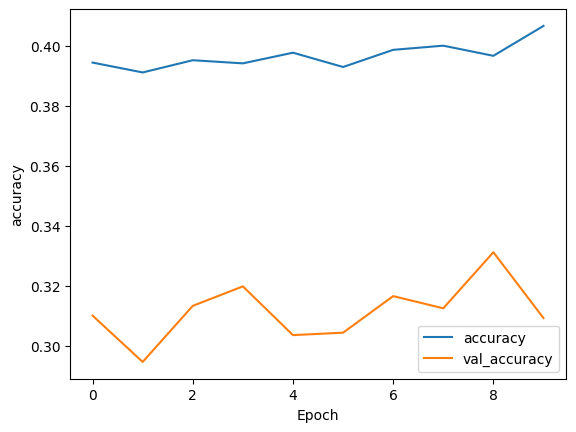

In [ ]:
plt.plot(last_model2_history.history['accuracy'], label='accuracy')
plt.plot(last_model2_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

**Modify3 Decrease Dense**

In [ ]:
last_model3 = Sequential()
last_model3.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01),input_shape = (192,192,3)))
last_model3.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model3.add(MaxPooling2D())
last_model3.add(layers.BatchNormalization())

last_model3.add(Conv2D(32,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model3.add(Conv2D(32,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model3.add(MaxPooling2D())
last_model3.add(layers.BatchNormalization())

last_model3.add(Flatten())
# reduce the dense layers from 126,126 to 64,64
last_model3.add(Dense(64,activation='relu'))
last_model3.add(Dense(64,activation='relu'))
last_model3.add(Dropout(0.5))
last_model3.add(Dense(104,activation='softmax'))

In [ ]:
last_model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 192, 192, 16)      448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 192, 192, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 96, 96, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 16)        64        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 32)        4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)       

In [ ]:
last_model3.compile(optimizer=Adam(0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics='accuracy')

In [ ]:
last_model3.load_weights('F:\\_lectures\\Semester5\\Z_model_data\\last_model3\\')

In [ ]:
last_model3_history = last_model3.fit(train,batch_size=32,epochs=10,validation_data=valid)

Epoch 1/10
361/361 [==============================] - 117s 320ms/step - loss: 4.1767 - accuracy: 0.0611 - val_loss: 4.1337 - val_accuracy: 0.0635
Epoch 2/10
361/361 [==============================] - 150s 416ms/step - loss: 4.1716 - accuracy: 0.0611 - val_loss: 4.1289 - val_accuracy: 0.0635
Epoch 3/10
361/361 [==============================] - 111s 307ms/step - loss: 4.1686 - accuracy: 0.0611 - val_loss: 4.1259 - val_accuracy: 0.0635
Epoch 4/10
361/361 [==============================] - 109s 302ms/step - loss: 4.1668 - accuracy: 0.0611 - val_loss: 4.1239 - val_accuracy: 0.0635
Epoch 5/10
361/361 [==============================] - 108s 300ms/step - loss: 4.1658 - accuracy: 0.0611 - val_loss: 4.1225 - val_accuracy: 0.0635
Epoch 6/10
361/361 [==============================] - 108s 298ms/step - loss: 4.1650 - accuracy: 0.0611 - val_loss: 4.1214 - val_accuracy: 0.0635
Epoch 7/10
361/361 [==============================] - 111s 307ms/step - loss: 4.1645 - accuracy: 0.0611 - val_loss: 4.1206 -

In [ ]:
last_model3.save_weights('F:\\_lectures\\Semester5\\Z_model_data\\last_model3\\')

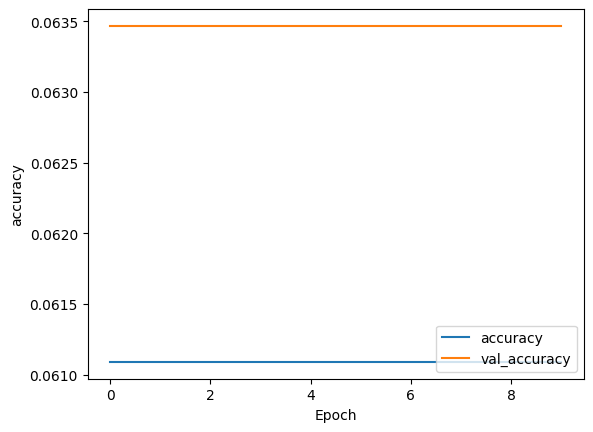

In [ ]:
plt.plot(last_model3_history.history['accuracy'], label='accuracy')
plt.plot(last_model3_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

**Modify4 increase Dense**

In [ ]:
last_model4 = Sequential()
last_model4.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01),input_shape = (192,192,3)))
last_model4.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model4.add(MaxPooling2D())
last_model4.add(layers.BatchNormalization())

last_model4.add(Conv2D(32,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model4.add(Conv2D(32,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
last_model4.add(MaxPooling2D())
last_model4.add(layers.BatchNormalization())

last_model4.add(Flatten())
last_model4.add(Dense(120,activation='relu'))
last_model4.add(Dense(64,activation='relu'))
last_model4.add(Dropout(0.5))
last_model4.add(Dense(104,activation='softmax'))

In [ ]:
last_model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 192, 192, 16)      448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 192, 192, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 96, 96, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 16)        64        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 32)        4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)       

In [ ]:
last_model4.compile(optimizer=Adam(0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics='accuracy')

In [ ]:
last_model4.load_weights('F:\\_lectures\\Semester5\\Z_model_data\\last_model4\\')

In [ ]:
last_model4_history = last_model4.fit(train,batch_size=32,epochs=10,validation_data=valid)

Epoch 1/10
361/361 [==============================] - 117s 322ms/step - loss: 2.5113 - accuracy: 0.3840 - val_loss: 2.9916 - val_accuracy: 0.3271
Epoch 2/10
361/361 [==============================] - 117s 325ms/step - loss: 2.4960 - accuracy: 0.3892 - val_loss: 2.8822 - val_accuracy: 0.3344
Epoch 3/10
361/361 [==============================] - 120s 333ms/step - loss: 2.4908 - accuracy: 0.3853 - val_loss: 2.8782 - val_accuracy: 0.3556
Epoch 4/10
361/361 [==============================] - 119s 330ms/step - loss: 2.4577 - accuracy: 0.3958 - val_loss: 2.8997 - val_accuracy: 0.3580
Epoch 5/10
361/361 [==============================] - 120s 331ms/step - loss: 2.4613 - accuracy: 0.3910 - val_loss: 2.9476 - val_accuracy: 0.3303
Epoch 6/10
361/361 [==============================] - 117s 323ms/step - loss: 2.4503 - accuracy: 0.4029 - val_loss: 2.9531 - val_accuracy: 0.3401
Epoch 7/10
361/361 [==============================] - 116s 323ms/step - loss: 2.4434 - accuracy: 0.3983 - val_loss: 2.9533 -

In [ ]:
last_model4.save_weights('F:\\_lectures\\Semester5\\Z_model_data\\last_model4\\')

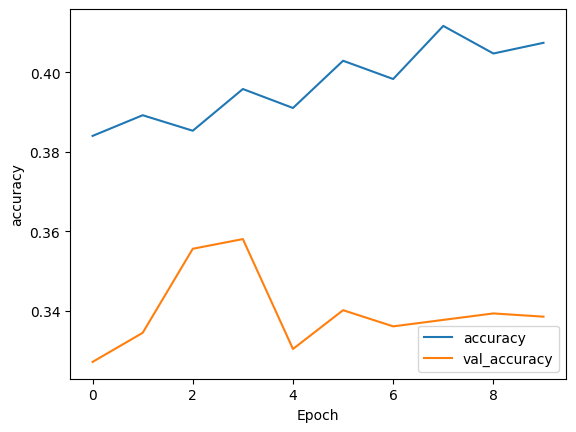

In [ ]:
plt.plot(last_model4_history.history['accuracy'], label='accuracy')
plt.plot(last_model4_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

# **1.1) Model0 (Extra)**

In [ ]:
#hand-made
#model 1
model = Sequential([
  layers.Conv2D(16, 3, activation='relu',input_shape=(192,192,3)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(104,activation='softmax')
])

In [ ]:
#compile model
model.compile(optimizer=Adam(0.001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
#load saved model data
model.load_weights('F:\\_lectures\\Semester5\\Z_model_data\\model0\\')

In [ ]:
#train the model
history = model.fit(train,epochs=1,batch_size=32,validation_data=valid)

361/361 [==============================] - 166s 455ms/step - loss: 1.0377 - accuracy: 0.7008 - val_loss: 2.9341 - val_accuracy: 0.3653


In [ ]:
#save the trained weights
model.save_weights('F:\\_lectures\\Semester5\\Z_model_data\\model0\\')

In [ ]:
#download the model
model.save('F:\\_lectures\\Semester5\\Z_model_data\\full_model\\')

INFO:tensorflow:Assets written to: F:\_lectures\Semester5\Z_model_data\full_model\assets


In [ ]:
y_pred = model.predict(t_img, batch_size=32, verbose=1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
#confusion matrix of model 1
cm = pd.DataFrame(confusion_matrix(y_true=test.classes, y_pred=np.argmax(y_predict, axis=-1)))
cm

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,3,0,1,0,2,12,19,2,1,3,...,2,5,1,2,1,4,1,1,0,0
1,2,0,0,0,0,1,4,1,1,0,...,0,0,0,1,1,0,0,0,0,0
2,2,1,0,2,0,6,11,2,1,0,...,0,1,1,1,0,0,1,0,0,0
3,0,0,0,0,0,2,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2,0,1,0,0,0,2,0,0,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2,0,0,1,0,5,7,1,1,2,...,1,0,0,5,1,0,0,1,0,0
100,1,1,2,0,0,4,7,1,1,2,...,1,1,0,4,0,0,0,2,0,0
101,0,0,0,0,0,1,2,0,0,0,...,1,0,1,0,0,0,0,0,0,0
102,0,0,0,0,0,2,2,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
x=recall_m(tclass,y_pred)
p=precision_m(tclass,y_pred)
f=f1_m(tclass,y_pred)
print(f'Recall {x}, precision {p}, f-score {f}')

Recall 0.6875, precision 0.8148148059844971, f-score 0.7457626461982727


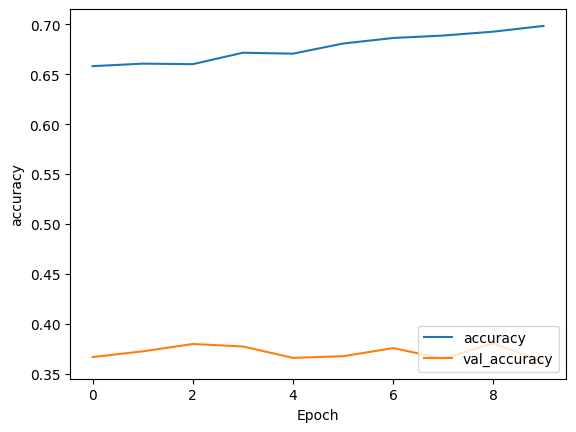

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

# **2) VGG Model**

In [ ]:
#vgg
vgg = Sequential()
vgg.add(Conv2D(input_shape = (192, 192, 3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))

vgg.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

vgg.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

vgg.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

vgg.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

vgg.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

vgg.add(Flatten())
vgg.add(Dense(units = 4096, activation = "relu"))
vgg.add(Dense(units = 4096, activation = "relu"))
vgg.add(Dense(units = 104, activation = "softmax"))

In [ ]:
vgg.compile(optimizer=Adam(learning_rate=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics="accuracy")

In [ ]:
vgg.load_weights("/content/drive/MyDrive/DL/vgg_param/")

In [ ]:
vgg_hist = vgg.fit(train,epochs=5,batch_size=32,validation_data=valid)

Epoch 1/5
361/361 [==============================] - 194s 536ms/step - loss: 0.1632 - accuracy: 0.9518 - val_loss: 3.4927 - val_accuracy: 0.4736
Epoch 2/5
361/361 [==============================] - 195s 540ms/step - loss: 0.1603 - accuracy: 0.9537 - val_loss: 3.6349 - val_accuracy: 0.4540
Epoch 3/5
361/361 [==============================] - 193s 535ms/step - loss: 0.1575 - accuracy: 0.9538 - val_loss: 3.5846 - val_accuracy: 0.4793
Epoch 4/5
361/361 [==============================] - 191s 529ms/step - loss: 0.1375 - accuracy: 0.9586 - val_loss: 3.4197 - val_accuracy: 0.4638
Epoch 5/5
361/361 [==============================] - 188s 521ms/step - loss: 0.1312 - accuracy: 0.9613 - val_loss: 3.5073 - val_accuracy: 0.4565


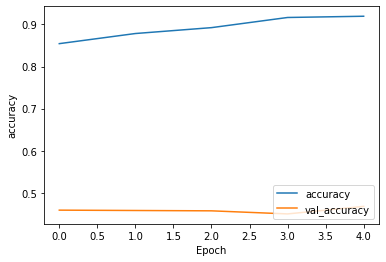

In [ ]:
plt.plot(vgg_hist.history['accuracy'], label='accuracy')
plt.plot(vgg_hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

In [ ]:
vgg.save_weights('/content/drive/MyDrive/DL/vgg_param/')


In [ ]:
vgg.save("/content/drive/MyDrive/DL/vgg_model/")

# **3) Google-Net Model**

In [ ]:
#google-net
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 

    path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)
    path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)
    path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
    path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)
    output_layer = concatenate([path1, path2, path3, path4], axis = -1)

    return output_layer

In [ ]:
def GoogLeNet():
    # input layer 
    input_layer = Input(shape = (192, 192, 3))

    # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
    X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

    # convolutional layer: filters = 64, strides = 1
    X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

    # convolutional layer: filters = 192, kernel_size = (3,3)
    X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

    # 1st Inception block
    X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

    # 2nd Inception block
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

    # 3rd Inception block
    X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

    # Extra network 1:
    X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
    X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
    X1 = Flatten()(X1)
    X1 = Dense(1024, activation = 'relu')(X1)
    X1 = Dropout(0.7)(X1)
    X1 = Dense(104, activation = 'softmax')(X1)


    # 4th Inception block
    X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

    # 5th Inception block
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

    # 6th Inception block
    X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

    # Extra network 2:
    X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
    X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
    X2 = Flatten()(X2)
    X2 = Dense(1024, activation = 'relu')(X2)
    X2 = Dropout(0.7)(X2)
    X2 = Dense(104, activation = 'softmax')(X2)


    # 7th Inception block
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

    # 8th Inception block
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

    # 9th Inception block
    X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

    # Global Average pooling layer 
    X = GlobalAveragePooling2D(name = 'GAPL')(X)

    # Dropoutlayer 
    X = Dropout(0.4)(X)

    # output layer 
    X = Dense(104, activation = 'softmax')(X)

    # model
    model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

    return model

In [ ]:
#define model and compile it
gn = GoogLeNet()
gn.compile(optimizer=Adam(learning_rate=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics="accuracy")

In [ ]:
gn.load_weights('F:\\_lectures\\Semester5\\Z_model_data\\GoogleNet\\')

In [ ]:
gn_history = gn.fit(train,epochs=1,batch_size=32,validation_data=valid)

361/361 [==============================] - 136s 349ms/step - loss: 1.6780 - dense_4_loss: 0.2119 - dense_1_loss: 0.9600 - dense_3_loss: 0.5062 - dense_4_accuracy: 0.9359 - dense_1_accuracy: 0.7074 - dense_3_accuracy: 0.8412 - val_loss: 7.1776 - val_dense_4_loss: 3.1309 - val_dense_1_loss: 1.7204 - val_dense_3_loss: 2.3262 - val_dense_4_accuracy: 0.5745 - val_dense_1_accuracy: 0.5810 - val_dense_3_accuracy: 0.5810


In [ ]:
gn.save_weights('F:\\_lectures\\Semester5\\Z_model_data\\GoogleNet\\')

In [ ]:
gn.save('F:\\_lectures\\Semester5\\Z_model_data\\full_inc\\')

INFO:tensorflow:Assets written to: F:\_lectures\Semester5\Z_model_data\full_inc\assets


In [ ]:
y_pred = gn.predict(t_img, batch_size=64, verbose=1)

1/1 [==============================] - 2s 2s/step


In [ ]:
cm = pd.DataFrame(confusion_matrix(y_true=test.classes, y_pred=np.argmax(y_predict, axis=-1)))
cm

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,3,0,1,0,2,12,19,2,1,3,...,2,5,1,2,1,4,1,1,0,0
1,2,0,0,0,0,1,4,1,1,0,...,0,0,0,1,1,0,0,0,0,0
2,2,1,0,2,0,6,11,2,1,0,...,0,1,1,1,0,0,1,0,0,0
3,0,0,0,0,0,2,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2,0,1,0,0,0,2,0,0,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2,0,0,1,0,5,7,1,1,2,...,1,0,0,5,1,0,0,1,0,0
100,1,1,2,0,0,4,7,1,1,2,...,1,1,0,4,0,0,0,2,0,0
101,0,0,0,0,0,1,2,0,0,0,...,1,0,1,0,0,0,0,0,0,0
102,0,0,0,0,0,2,2,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
x=recall_m(tclass,y_pred)
p=precision_m(tclass,y_pred)
f=f1_m(tclass,y_pred)
print(f'Recall {x}, precision {p}, f-score {f}')

Recall 2.71875, precision 0.9354838728904724, f-score 1.3920000791549683


In [ ]:
gn_history.history

{'loss': [1.6780478954315186],
 'dense_4_loss': [0.2118670791387558],
 'dense_1_loss': [0.959990918636322],
 'dense_3_loss': [0.5061896443367004],
 'dense_4_accuracy': [0.9358729720115662],
 'dense_1_accuracy': [0.7073932886123657],
 'dense_3_accuracy': [0.8412009477615356],
 'val_loss': [7.177576065063477],
 'val_dense_4_loss': [3.1309053897857666],
 'val_dense_1_loss': [1.720436692237854],
 'val_dense_3_loss': [2.3262343406677246],
 'val_dense_4_accuracy': [0.5744507908821106],
 'val_dense_1_accuracy': [0.5809601545333862],
 'val_dense_3_accuracy': [0.5809601545333862]}

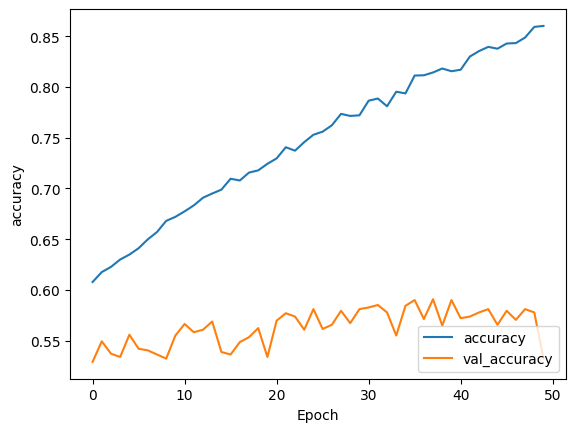

In [ ]:
plt.plot(gn_history.history['dense_15_accuracy'], label='accuracy')
plt.plot(gn_history.history['val_dense_15_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

# **4)Transfer Learning**

In [ ]:
#transfer
#not including top (not including the dense layer at the top of the model)
trans_model = tf.keras.applications.Xception(weights='imagenet',input_shape=(192,192, 3),include_top=False)

In [ ]:
#freeze all the weights from the transfered model (no need to train them)
trans_model.trainable = False

In [ ]:
# make a model as output for the trasfered model
inputs = tf.keras.Input(shape=(192, 192, 3))
x = trans_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(104,activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics='accuracy')

In [ ]:
model.load_weights('F:\\_lectures\\Semester5\\Z_model_data\\trans\\')

In [ ]:
trans_history=model.fit(train, epochs=50,batch_size=32, validation_data=valid)

Epoch 1/50
361/361 [==============================] - 160s 443ms/step - loss: 3.7661 - accuracy: 0.1797 - val_loss: 3.2769 - val_accuracy: 0.2701
Epoch 2/50
361/361 [==============================] - 112s 311ms/step - loss: 3.0294 - accuracy: 0.3212 - val_loss: 2.7855 - val_accuracy: 0.3588
Epoch 3/50
361/361 [==============================] - 112s 311ms/step - loss: 2.6138 - accuracy: 0.4026 - val_loss: 2.4796 - val_accuracy: 0.4247
Epoch 4/50
361/361 [==============================] - 113s 312ms/step - loss: 2.3578 - accuracy: 0.4515 - val_loss: 2.2610 - val_accuracy: 0.4760
Epoch 5/50
361/361 [==============================] - 112s 310ms/step - loss: 2.1700 - accuracy: 0.4934 - val_loss: 2.1213 - val_accuracy: 0.5053
Epoch 6/50
361/361 [==============================] - 112s 310ms/step - loss: 2.0334 - accuracy: 0.5252 - val_loss: 2.0014 - val_accuracy: 0.5403
Epoch 7/50
361/361 [==============================] - 113s 312ms/step - loss: 1.9210 - accuracy: 0.5436 - val_loss: 1.9175 -

In [ ]:
model.save_weights('F:\\_lectures\\Semester5\\Z_model_data\\trans\\')

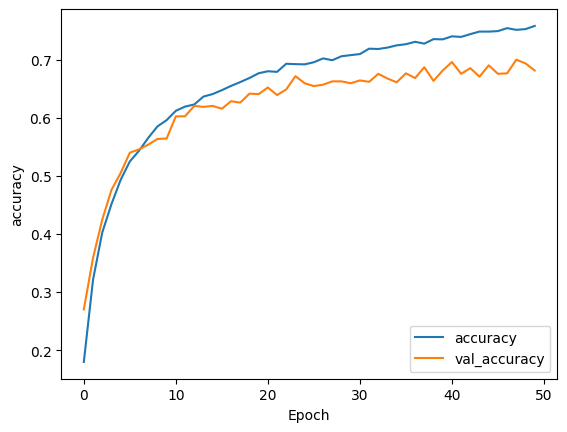

In [ ]:
plt.plot(trans_history.history['accuracy'], label='accuracy')
plt.plot(trans_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

In [ ]:
y_pred = model.predict(t_img, batch_size=32, verbose=1)

1/1 [==============================] - 0s 22ms/step


In [ ]:
cm = pd.DataFrame(confusion_matrix(y_true=test.classes, y_pred=np.argmax(y_predict, axis=-1)))
cm

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,3,0,1,0,2,12,19,2,1,3,...,2,5,1,2,1,4,1,1,0,0
1,2,0,0,0,0,1,4,1,1,0,...,0,0,0,1,1,0,0,0,0,0
2,2,1,0,2,0,6,11,2,1,0,...,0,1,1,1,0,0,1,0,0,0
3,0,0,0,0,0,2,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2,0,1,0,0,0,2,0,0,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2,0,0,1,0,5,7,1,1,2,...,1,0,0,5,1,0,0,1,0,0
100,1,1,2,0,0,4,7,1,1,2,...,1,1,0,4,0,0,0,2,0,0
101,0,0,0,0,0,1,2,0,0,0,...,1,0,1,0,0,0,0,0,0,0
102,0,0,0,0,0,2,2,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
x=recall_m(tclass,y_pred)
p=precision_m(tclass,y_pred)
f=f1_m(tclass,y_pred)
print(f'Recall {x}, precision {p}, f-score {f}')

Recall 0.5, precision 0.9411764740943909, f-score 0.6530612111091614


# **5) Ensemble**

In [ ]:
#ensemble
model1 = tf.keras.models.load_model('F:\\_lectures\\Semester5\\Z_model_data\\model0\\') 
model2 = tf.keras.models.load_model('F:\\_lectures\\Semester5\\Z_model_data\\full_model\\') 

In [ ]:
#load models and append them to a list
models=[]
models.append(model1)
models.append(model2)

In [ ]:
model_input = tf.keras.Input(shape=(192, 192, 3)) #takes a list of tensors as input, all of the same shape
model_outputs = [model(model_input) for model in models] #collects outputs of models in a list
ensemble_output = tf.keras.layers.Average()(model_outputs) #averaging outputs
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [ ]:
ensemble_model.compile(optimizer=Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics='accuracy')

In [ ]:
ensemble_model.load_weights('F:\\_lectures\\Semester5\\Z_model_data\\ens\\')

In [ ]:
ens_history=ensemble_model.fit(train,batch_size=32,epochs=10,validation_data=valid)

Epoch 1/10
361/361 [==============================] - 123s 340ms/step - loss: 0.9369 - accuracy: 0.7482 - val_loss: 2.7444 - val_accuracy: 0.4182
Epoch 2/10
361/361 [==============================] - 120s 332ms/step - loss: 0.9280 - accuracy: 0.7517 - val_loss: 2.7603 - val_accuracy: 0.4223
Epoch 3/10
361/361 [==============================] - 120s 333ms/step - loss: 0.9108 - accuracy: 0.7594 - val_loss: 2.7418 - val_accuracy: 0.4174
Epoch 4/10
361/361 [==============================] - 120s 333ms/step - loss: 0.9142 - accuracy: 0.7553 - val_loss: 2.7063 - val_accuracy: 0.4223
Epoch 5/10
361/361 [==============================] - 121s 336ms/step - loss: 0.9094 - accuracy: 0.7619 - val_loss: 2.7402 - val_accuracy: 0.4174
Epoch 6/10
361/361 [==============================] - 119s 329ms/step - loss: 0.8836 - accuracy: 0.7728 - val_loss: 2.8015 - val_accuracy: 0.4329
Epoch 7/10
361/361 [==============================] - 120s 331ms/step - loss: 0.8703 - accuracy: 0.7736 - val_loss: 2.8618 -

In [ ]:
ensemble_model.save_weights('F:\\_lectures\\Semester5\\Z_model_data\\ens\\')

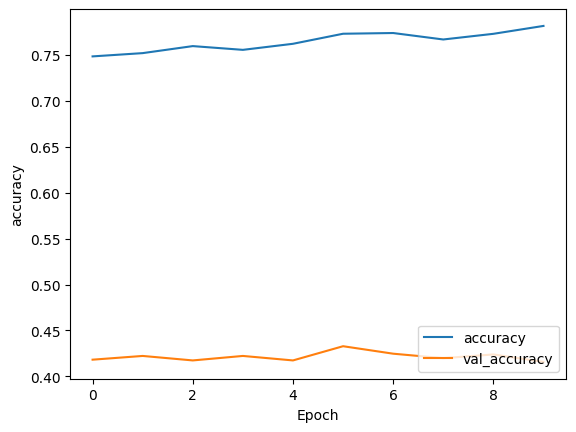

In [ ]:
plt.plot(ens_history.history['accuracy'], label='accuracy')
plt.plot(ens_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

In [ ]:
y_pred = ensemble_model.predict(t_img, batch_size=32, verbose=1)

1/1 [==============================] - 0s 388ms/step


In [ ]:
cm = pd.DataFrame(confusion_matrix(y_true=test.classes, y_pred=np.argmax(y_predict, axis=-1)))
cm

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,3,0,1,0,2,12,19,2,1,3,...,2,5,1,2,1,4,1,1,0,0
1,2,0,0,0,0,1,4,1,1,0,...,0,0,0,1,1,0,0,0,0,0
2,2,1,0,2,0,6,11,2,1,0,...,0,1,1,1,0,0,1,0,0,0
3,0,0,0,0,0,2,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2,0,1,0,0,0,2,0,0,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2,0,0,1,0,5,7,1,1,2,...,1,0,0,5,1,0,0,1,0,0
100,1,1,2,0,0,4,7,1,1,2,...,1,1,0,4,0,0,0,2,0,0
101,0,0,0,0,0,1,2,0,0,0,...,1,0,1,0,0,0,0,0,0,0
102,0,0,0,0,0,2,2,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
x=recall_m(tclass,y_pred)
p=precision_m(tclass,y_pred)
f=f1_m(tclass,y_pred)
print(f'Recall {x}, precision {p}, f-score {f}')

Recall 0.78125, precision 1.0, f-score 0.8771929144859314


In [ ]:
y = np.array(y_pred[0][0])
train_labels[np.argmax(y)]

'siam tulip'

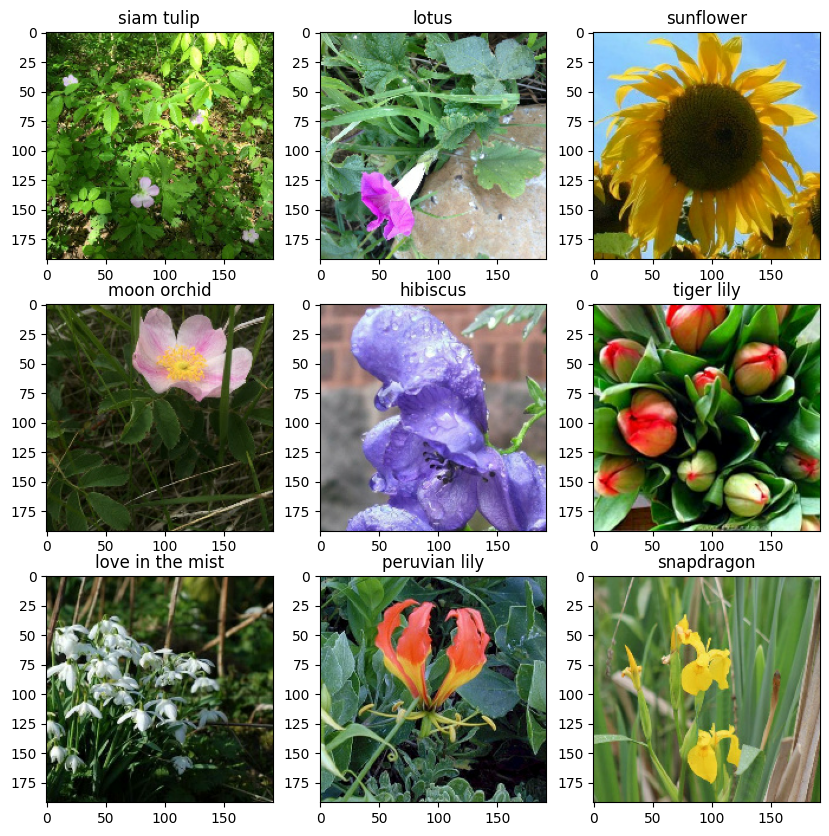

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3,i + 1)
    plt.imshow(t_img[i])
    y = np.array(y_pred[0][i])
    plt.title(train_labels[np.argmax(y)])